Q1-A

<StemContainer object of 3 artists>

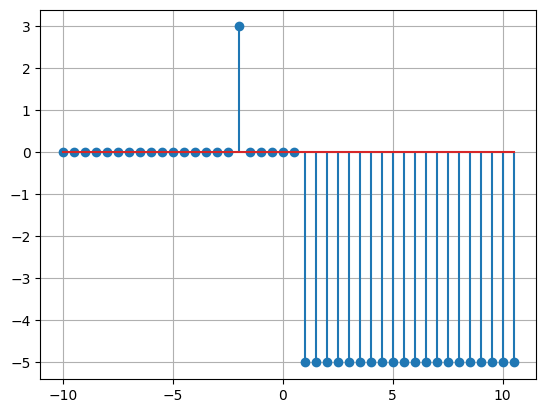

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# unit impulse signal, domain is halved to make possible the addition of the two signals
delta_range = np.arange(-10, 11, 0.5)
delta = np.zeros(delta_range.shape)
# create 3delta[signal_range+2]
delta[delta_range == -2] = 3

# unit step function, domain is halved: u[2n]
unit_range = np.arange(-10, 11, 0.5)
u = np.zeros(unit_range.shape)
# shift by one
u[unit_range >= 1] = 1
# scale by 5
u = -5 * u
# delta + u = x[signal_range]
x = delta + u

plt.grid()
plt.stem(unit_range, x)

Q1-B

/home/mohadeseh/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mohadeseh/.local/lib/python3.10/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/mohadeseh/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<StemContainer object of 3 artists>

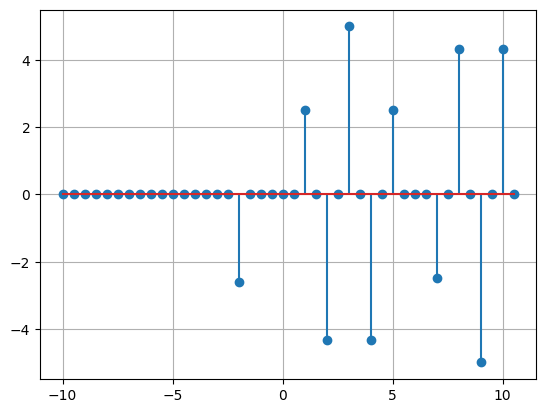

In [2]:
y = np.zeros(unit_range.shape, dtype=np.complex64)
for i in range(len(unit_range)):
    y[i] = np.exp(1j * np.pi * unit_range[i]) * x[i] * np.sin(np.pi * unit_range[i] / 6)
    
plt.grid()
plt.stem(unit_range, y)

Q1-C

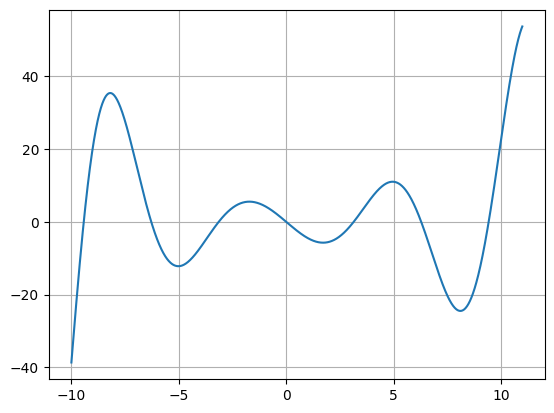

In [3]:
t = np.arange(-10, 11, 0.01)
z = np.zeros(t.shape)
for i in range(len(t)):
# z(t) = (3(-1.3)^t + 2(-0.7)^t) * sin(t)
    # note: Numpy does not seem to allow fractional powers of negative numbers
    z[i] = (3 * np.sign(-1.3) * (np.abs(-1.3)) ** (t[i]) + 2 * np.sign(-0.7) * (np.abs(-0.7)) ** (t[i])) * np.sin(t[i])

plt.grid()
plt.plot(t, z)

Q1-D

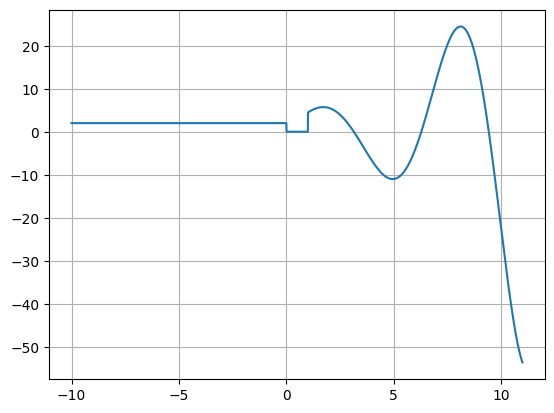

In [4]:
w = np.zeros(t.shape)
# t >= 1: w(t) = -z(t)
w[t >= 1] = -z[t >= 1]
# t < 1: w(t) = 2u(-t)
w[t < 0] = 2

plt.grid()
plt.plot(t, w)

Q2

<StemContainer object of 3 artists>

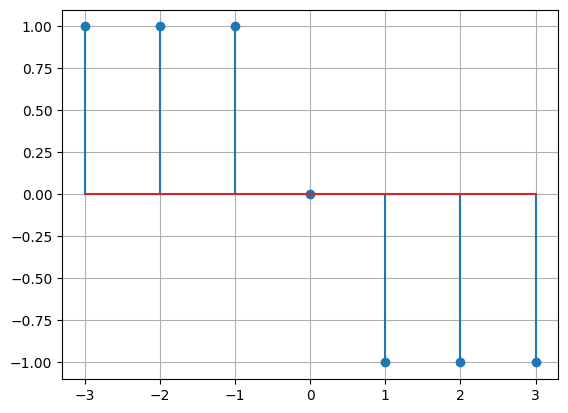

In [5]:
signal_range = np.arange(-3, 4)
x = np.zeros(signal_range.shape)
x[signal_range == -3] = 3
x[signal_range == -2] = -1
x[signal_range == -1] = 0
x[signal_range == 0] = 2
x[signal_range == 1] = -2
x[signal_range == 2] = -3
x[signal_range == 3] = 1

# mirror x around the y-axis
x_mirror = np.flip(x)
# x + x_mirror / 2 = even
even = (x + x_mirror) / 2
# x - x_mirror / 2 = odd
odd = (x - x_mirror) / 2

# plot the signals
plt.grid()
# plt.stem(signal_range, x, label="x")
# plt.stem(signal_range, even, label="Even")
plt.stem(signal_range, odd, label="Odd")


Q3

Enter a function: tanh


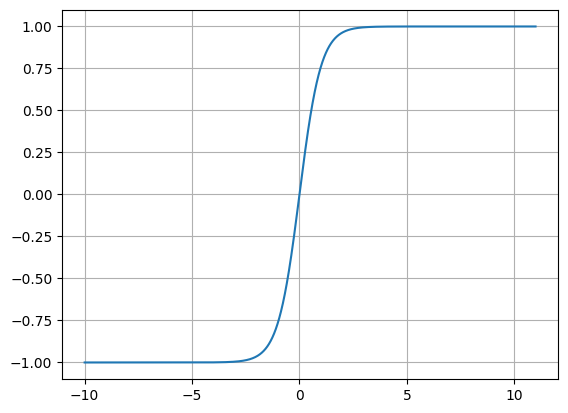

In [6]:
# input a vector and a function
# vector = np.array(map(int, input("Enter a vector: ").split()))
function = input("Enter a function: ")
vector = t

if function == "sin":
    result = np.sin(vector)
elif function == "cos":
    result = np.cos(vector)
elif function == "tanh":
    result = np.tanh(vector)
elif function == "exp":
    result = np.exp(vector)
else:
    print("Invalid function")
    result = None
    

if result is not None:
    plt.grid()
    plt.plot(vector, result)


Q4-A

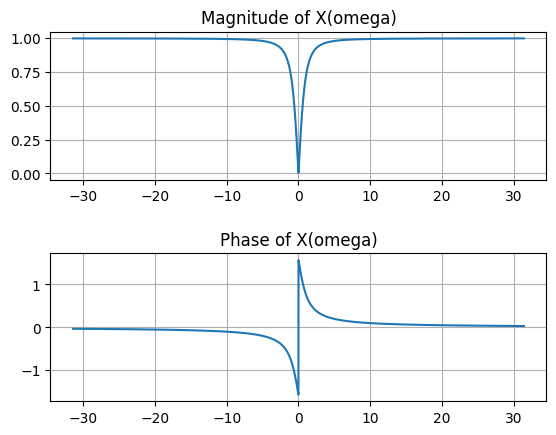

In [7]:
# -10pi <= omega <= 10pi
omega = np.arange(-10 * np.pi, 10 * np.pi, 0.01)
# X(omega) = j*omega / (1 + j*omega)
X = np.zeros(omega.shape, dtype=np.complex64)
for i in range(len(omega)):
    X[i] = 1j * omega[i] / (1 + 1j * omega[i])
    
# using subplot, show magnitude and phase
plt.subplot(2, 1, 1)
plt.title("Magnitude of X(omega)")
plt.grid()
plt.plot(omega, np.abs(X))

# add some space
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.title("Phase of X(omega)")
plt.grid()
plt.plot(omega, np.angle(X))


Q4-B

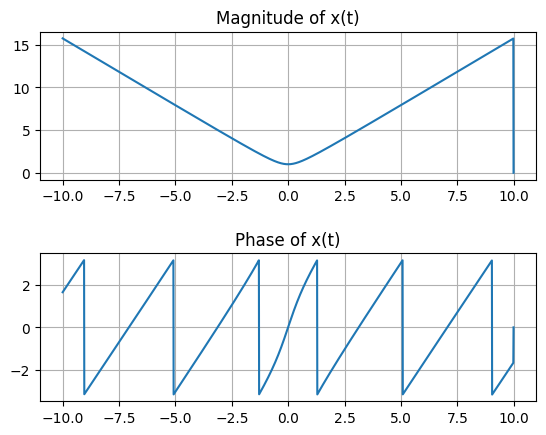

In [8]:
t = np.arange(-10, 10, 0.01)
# x = np.zeros(t.shape, dtype=np.complex64)
func = t * np.exp((2 * np.pi * t * 1j) / 4)

# differentiate the function
x = np.diff(func) / np.diff(t)
# add a zero to the end to match the length of t
x = np.append(x, 0)

plt.subplot(2, 1, 1)
plt.title("Magnitude of x(t)")
plt.grid()
plt.plot(t, np.abs(x))

# add some space
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.title("Phase of x(t)")
plt.grid()
plt.plot(t, np.angle(x))